### DOMAIN:
#### Manufacturing

### CONTEXT:
#### Company X curates and packages wine across various vineyards spread throughout the country.

### DATA DESCRIPTION:
#### The data concerns the chemical composition of the wine and its respective quality.

### Attribute Information:
#### 1.A, B, C, D: specific chemical composition measure of the wine
#### 2. Quality: quality of wine [ Low and High ]

### PROJECT OBJECTIVE:
#### Goal is to build a synthetic data generation model using the existing data provided by the company.

In [11]:
#Loading the required packages
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os

In [12]:
os.chdir('C:\\Users\\RajSri\\Documents\\PGP AIML GL Notebooks\\19. Unsupervised Learning - Project')

In [13]:
wi=pd.read_excel('Part2 - Company.xlsx')

In [14]:
wi.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [15]:
row, column = wi.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 61 rows and 5 columns


In [16]:
#make a copy of the data
wi1=wi.copy()

In [17]:
#dropping the target variable
wi=wi.drop('Quality',axis=1)


In [18]:
#checking for data types
print('The data type of each attribute: \n')
wi1.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
A          61 non-null int64
B          61 non-null int64
C          61 non-null int64
D          61 non-null int64
Quality    43 non-null object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [20]:

wi1.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

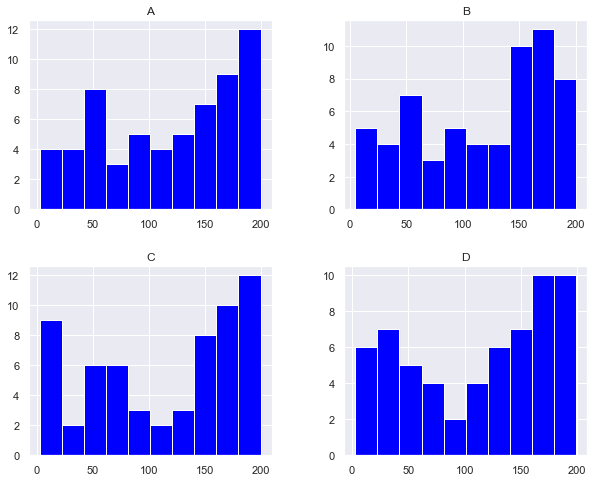

In [21]:
#checking the distribution of the data points
wi.hist(bins = 10, figsize = (10, 8), color = 'blue')
plt.show()

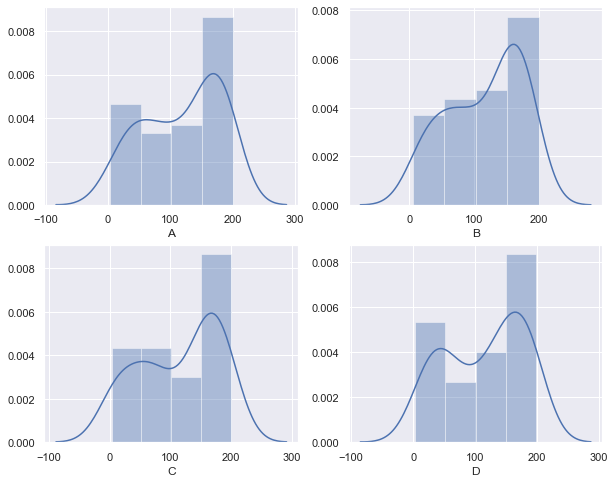

In [22]:
#checking for the density of the variable
plt.figure(figsize=(10, 8))
col = 1
for i in wi.columns:
    plt.subplot(2, 2, col)
    sns.distplot(wi[i], color = 'b')
    col += 1 


#### Insight: The chemical compositions are on the same scales between 0 to 200

In [23]:
#scaling the numeric variables
w1 = wi.apply(zscore)
w1.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [24]:
#checking for the distribution of the target variables
wi1['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

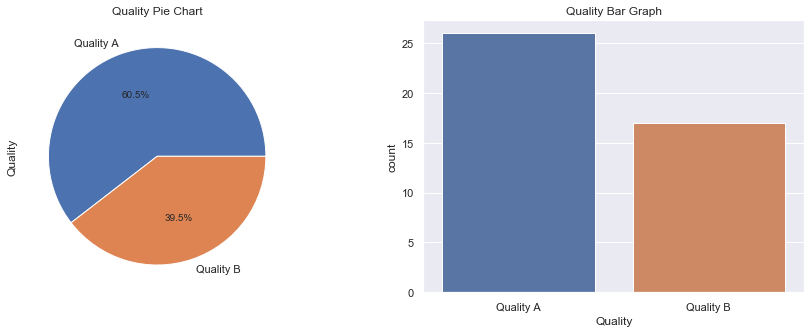

In [26]:
f,axes=plt.subplots(1,2,figsize=(15,5))
wi1['Quality'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Quality',data=wi1,ax=axes[1])
axes[0].set_title('Quality Pie Chart')
axes[1].set_title('Quality Bar Graph')
plt.show()

In [27]:
#applying kmeans with 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(w1)
labels = k_means.labels_

In [28]:
# Calculating silhouette_score
silhouette_score(w1,labels)

0.6891674125195145

In [29]:
#attaching the cluster labels to the original dataset
wi1["Quality_k"] = labels

In [30]:
#checking for the first 15 observations
wi1.head(15)

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
5,153,140,154,199,NaN,0
6,34,28,78,22,Quality A,1
7,191,144,143,154,NaN,0
8,160,181,194,178,Quality B,0
9,145,178,158,141,NaN,0


In [32]:
#renaming the cluster labels
wi1['Quality_k'] = wi1['Quality_k'].replace({0: 'Quality A', 1: 'Quality B'})
wi1

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
2,159,163,135,131,NaN,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,Quality A
57,137,182,165,199,NaN,Quality A
58,88,39,9,102,NaN,Quality B
59,180,157,192,198,NaN,Quality A


In [33]:
#checking for datatypes
wi1.dtypes

A             int64
B             int64
C             int64
D             int64
Quality      object
Quality_k    object
dtype: object

In [34]:
#dropping na rows
wn=wi1.dropna()

In [38]:
#checking for the shape
wn.shape

(43, 6)

In [39]:
#using the cluster labels and actual target labels to check for accuracy
pred = wn['Quality_k']
actual=wn['Quality']

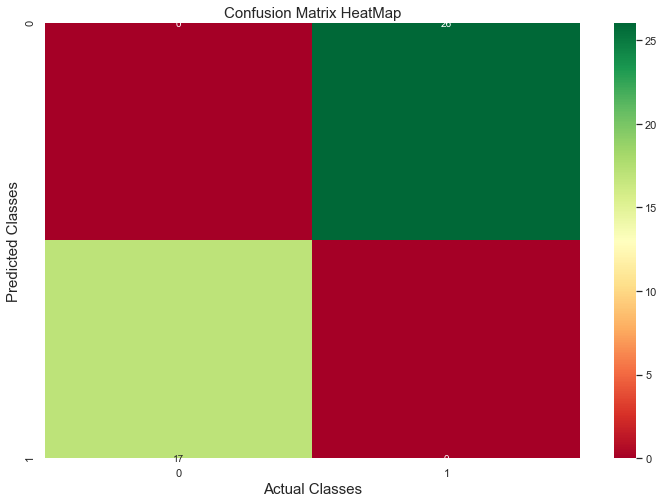

In [40]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(actual, pred)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

### Summary: There appears to be no misclassification when checking the it with the non missing target variables and the predicted clusters, Hence the new labels can be used as a target variable